In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt


In [2]:
# Load the California housing dataset
california_housing = fetch_california_housing()
print(california_housing)


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [3]:
data = california_housing.data
target = california_housing.target

In [4]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data, columns=california_housing.feature_names)
df['target'] = target

In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
# Descriptive statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
target      0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude    target  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

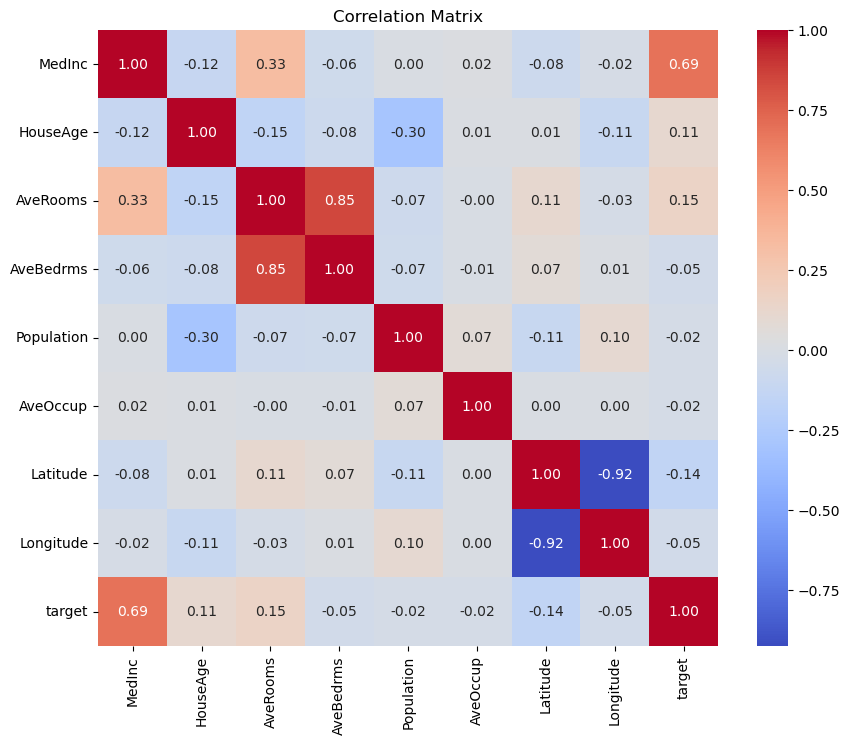

In [7]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [8]:
# Check for missing values
print(df.isnull().sum())


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


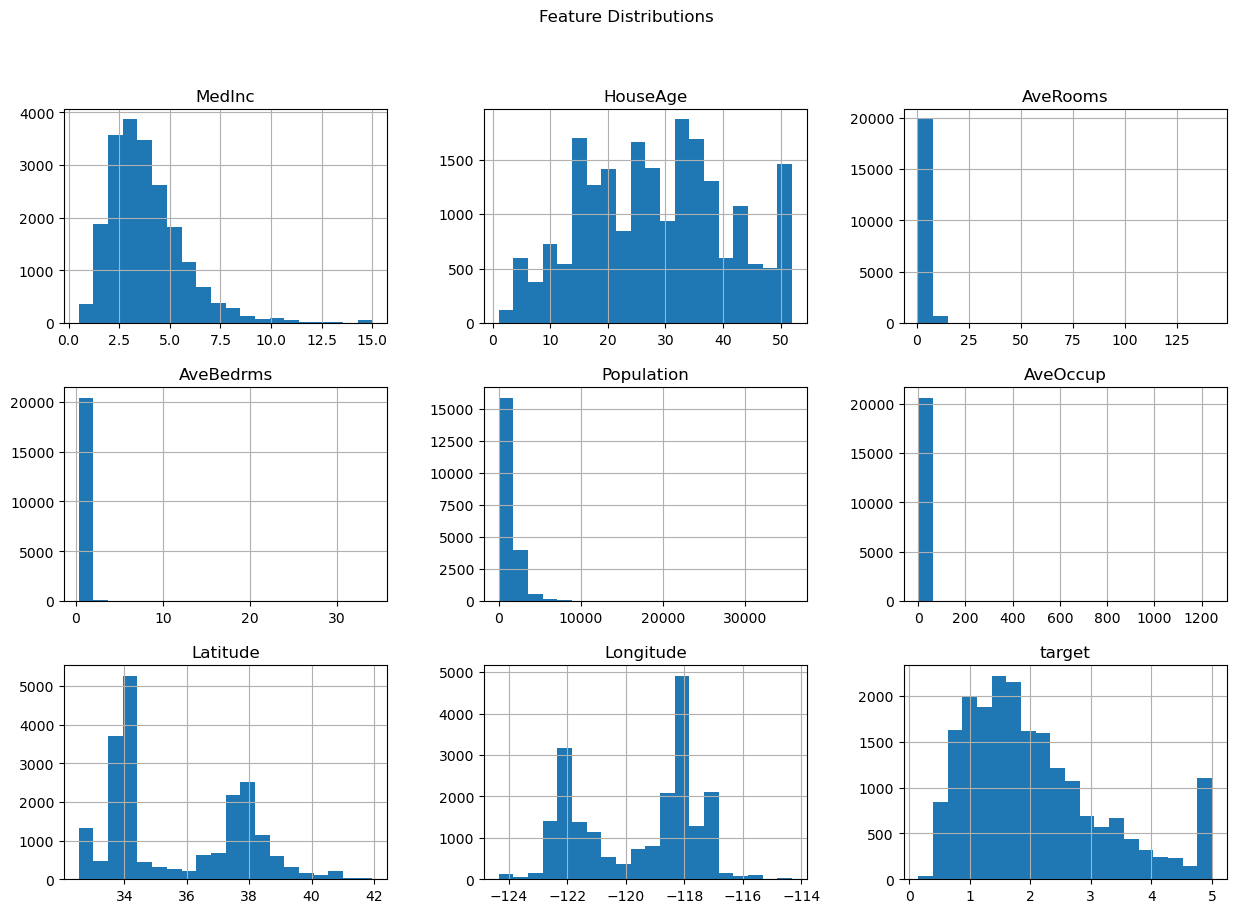

In [9]:
# Distribution of each feature and target
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()


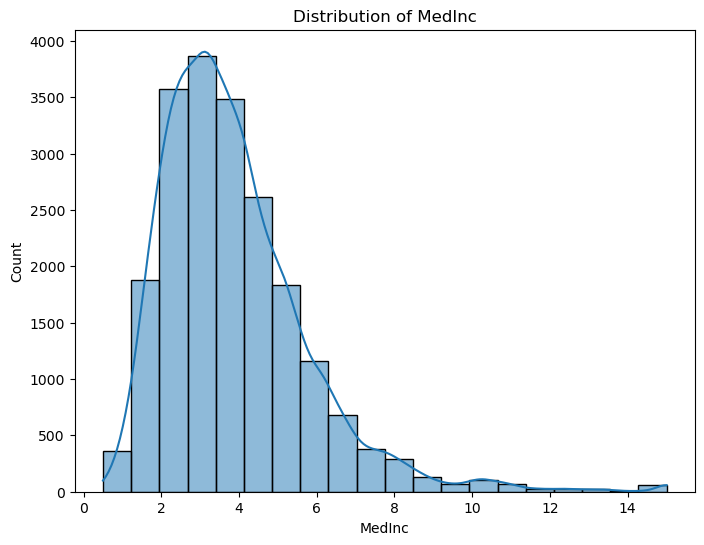

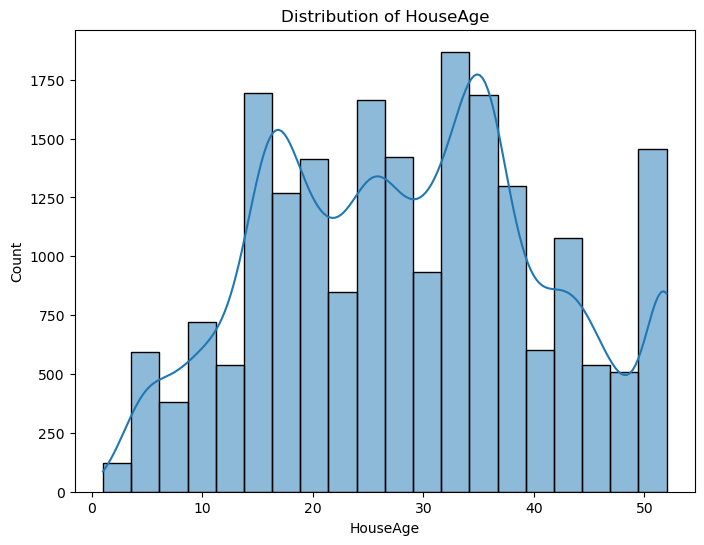

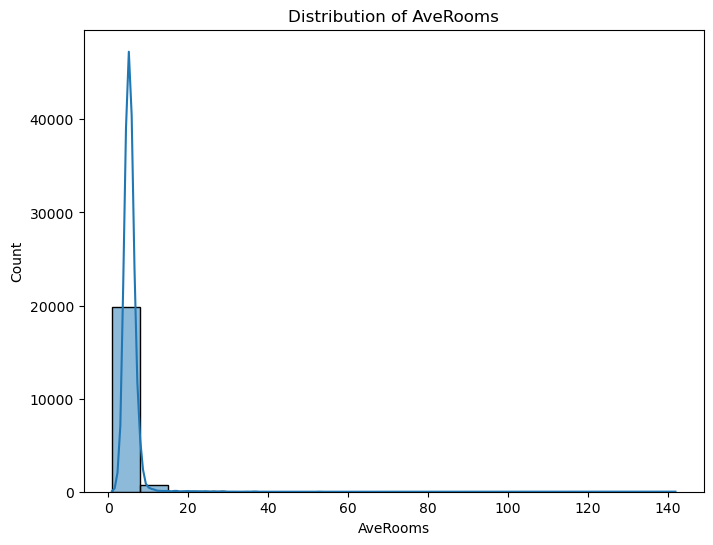

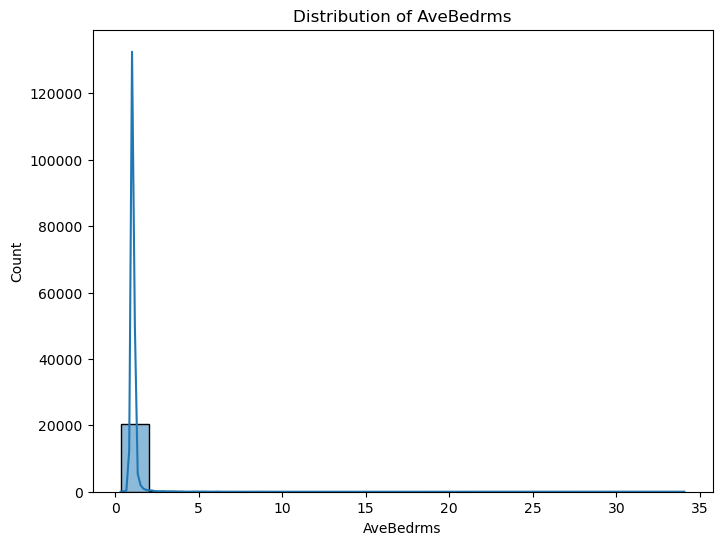

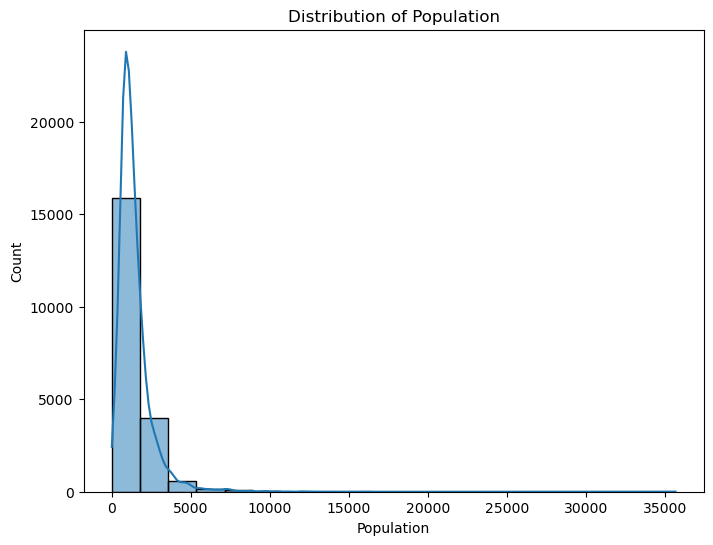

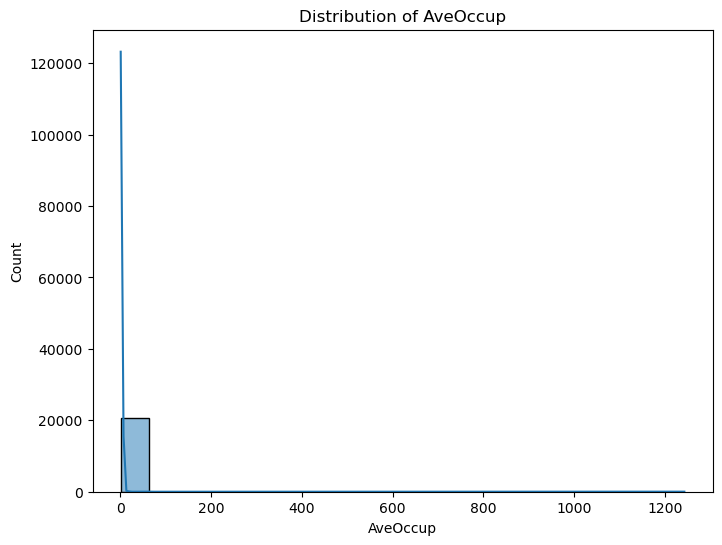

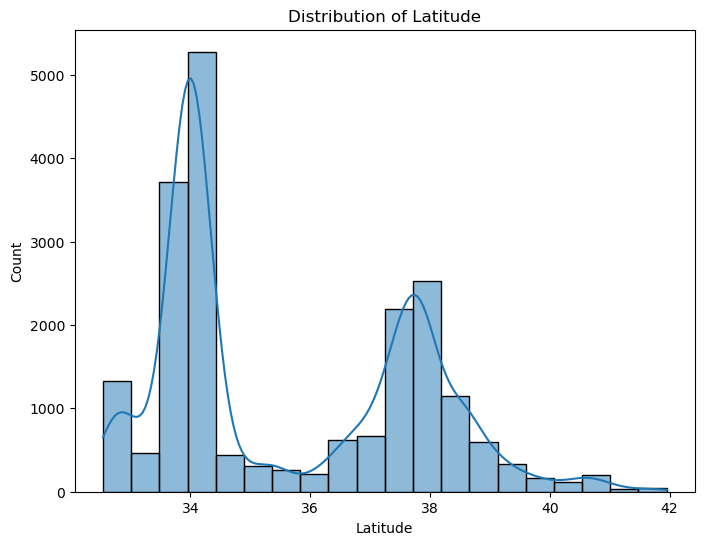

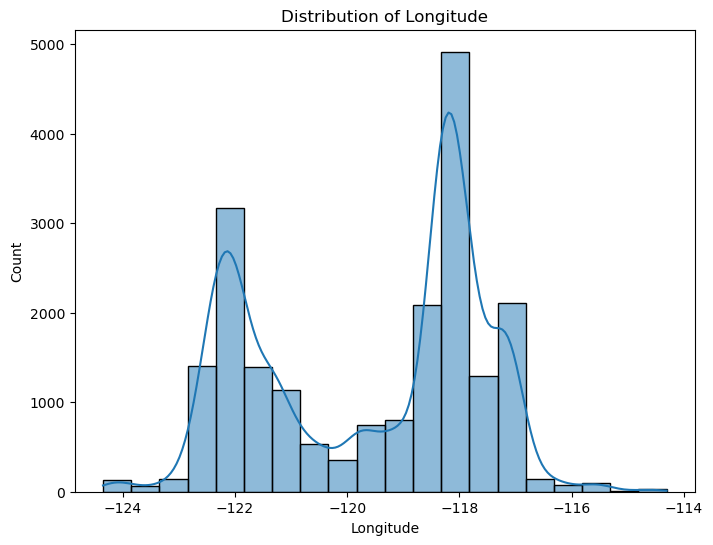

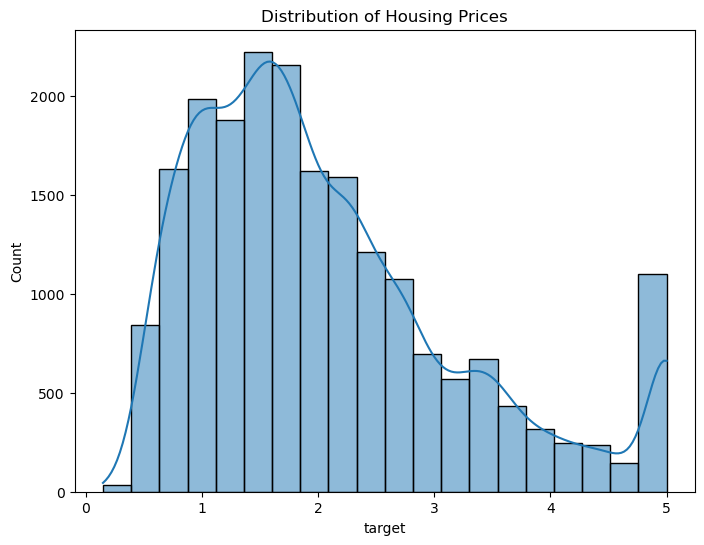

In [10]:
import seaborn as sns

# Distribution of each feature
for feature in df.drop('target', axis=1).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Distribution of the target (housing prices)
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], kde=True, bins=20)
plt.title('Distribution of Housing Prices')
plt.show()


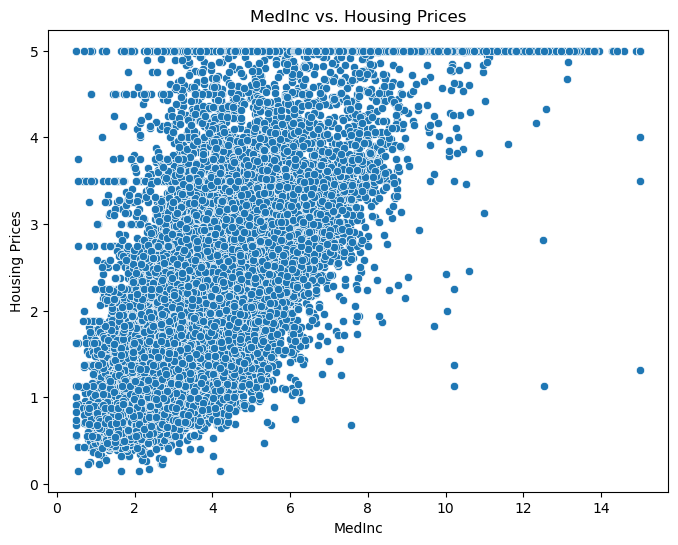

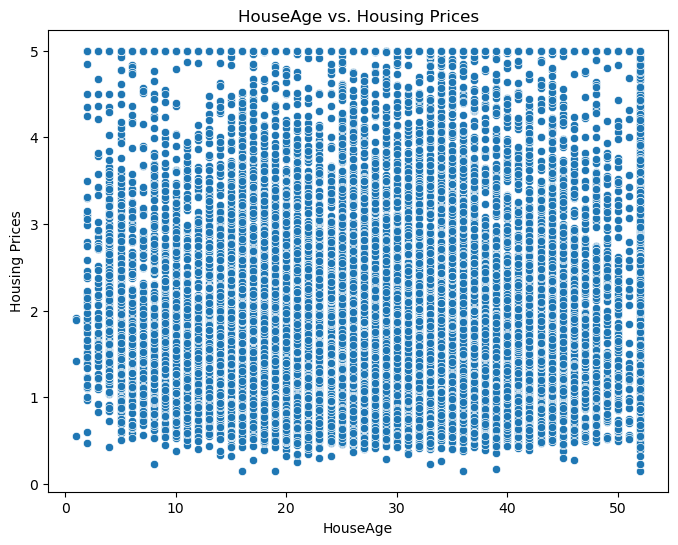

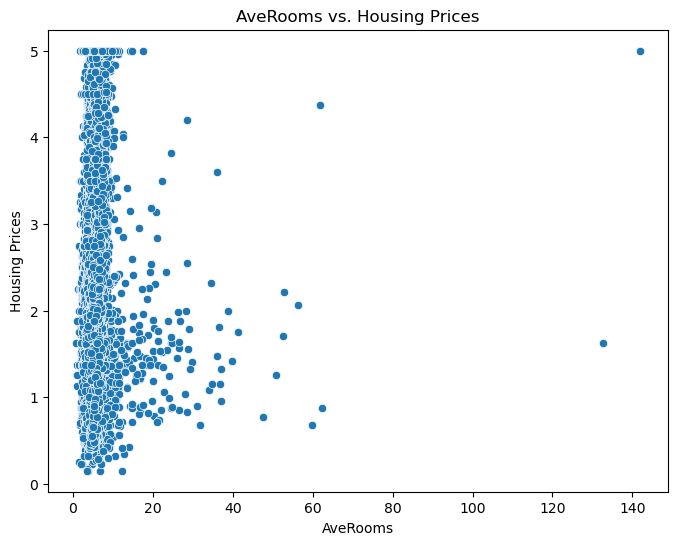

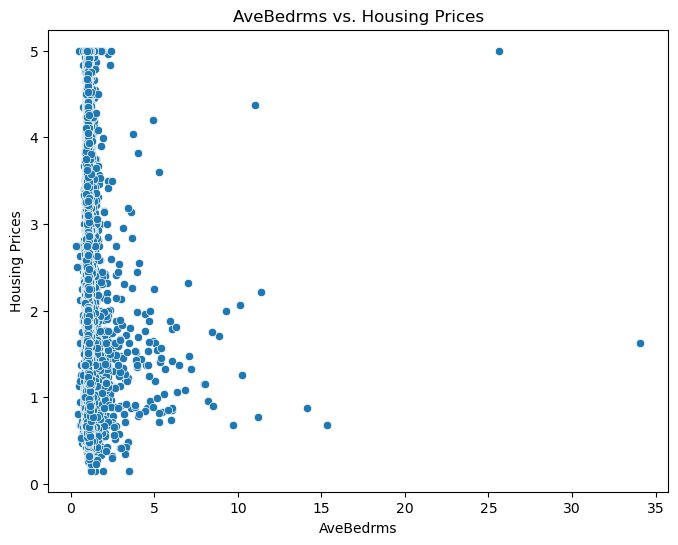

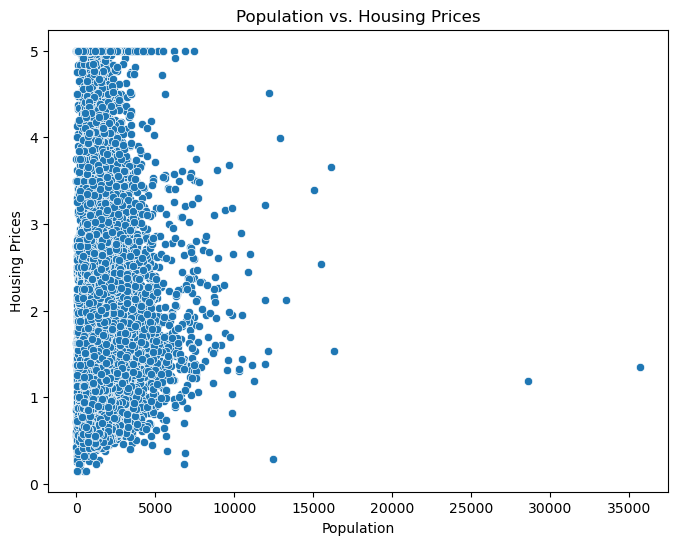

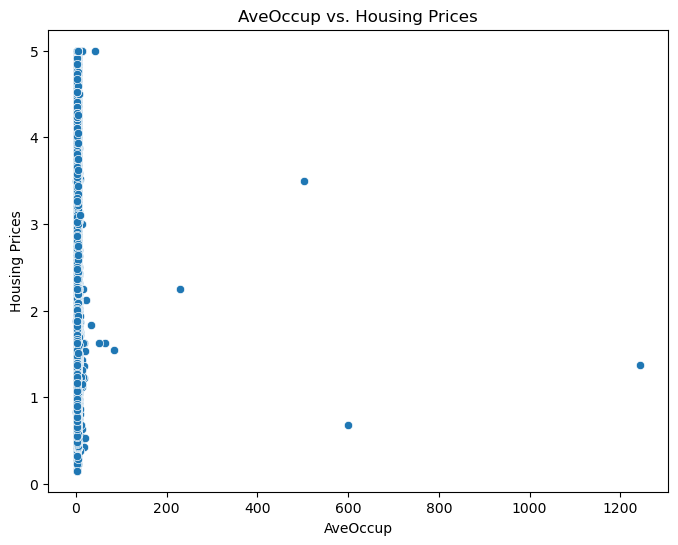

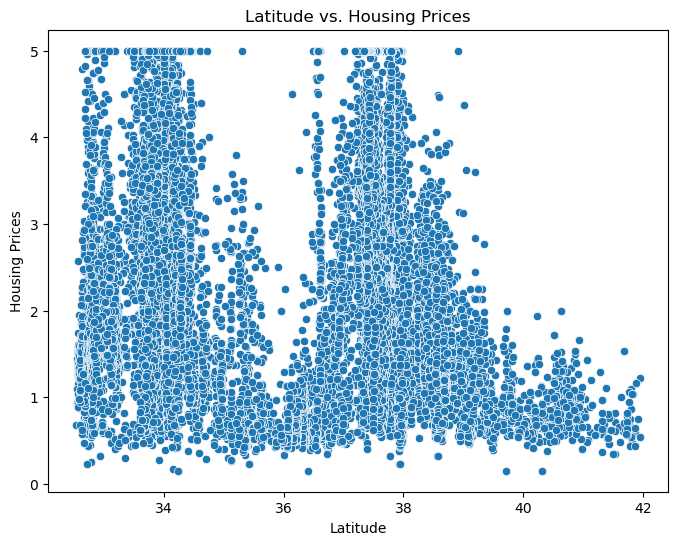

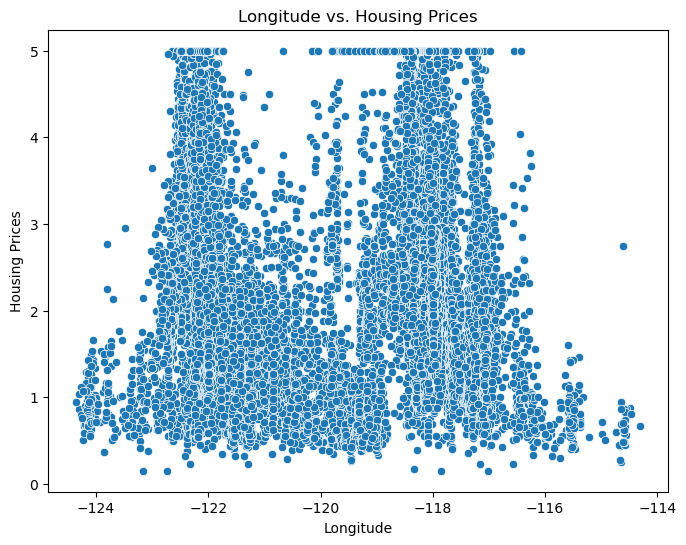

In [11]:
# Scatter plots to show relationship between each feature and target
for feature in df.drop('target', axis=1).columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['target'])
    plt.title(f'{feature} vs. Housing Prices')
    plt.xlabel(feature)
    plt.ylabel('Housing Prices')
    plt.show()


MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
target         0.977763
dtype: float64


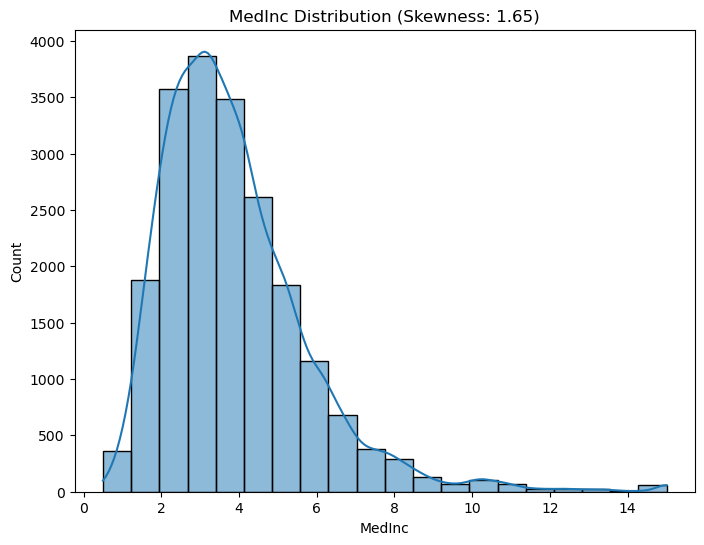

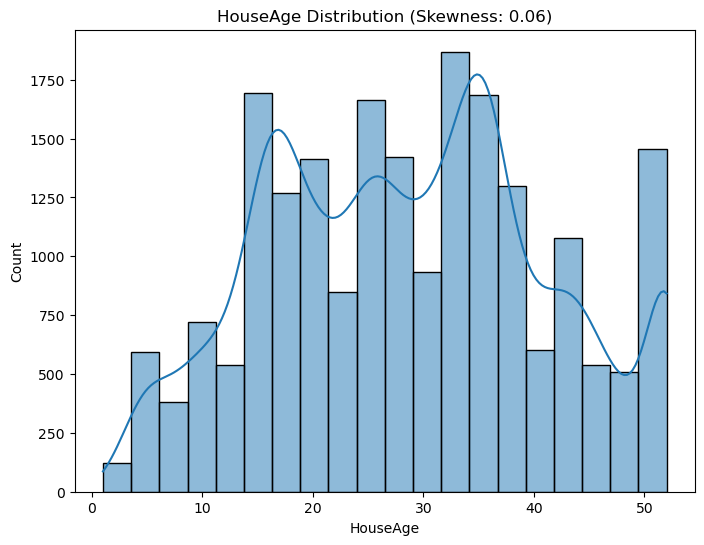

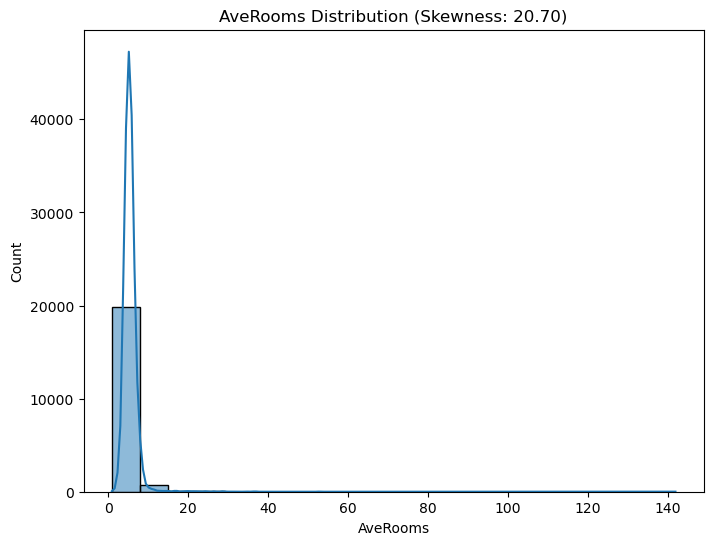

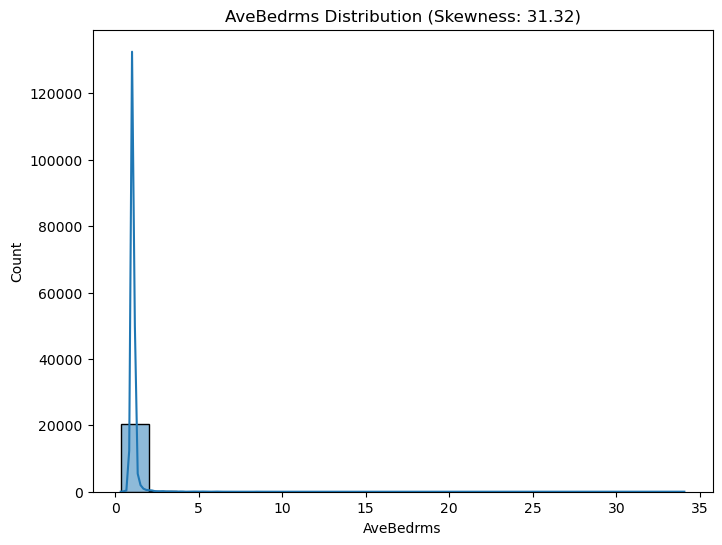

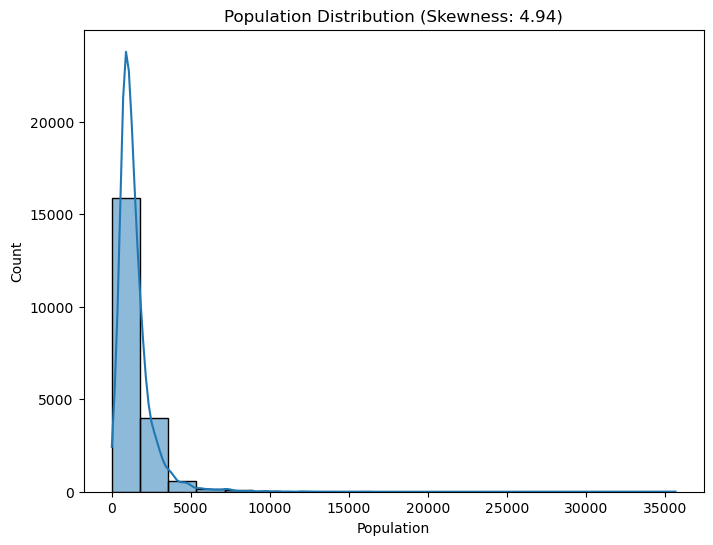

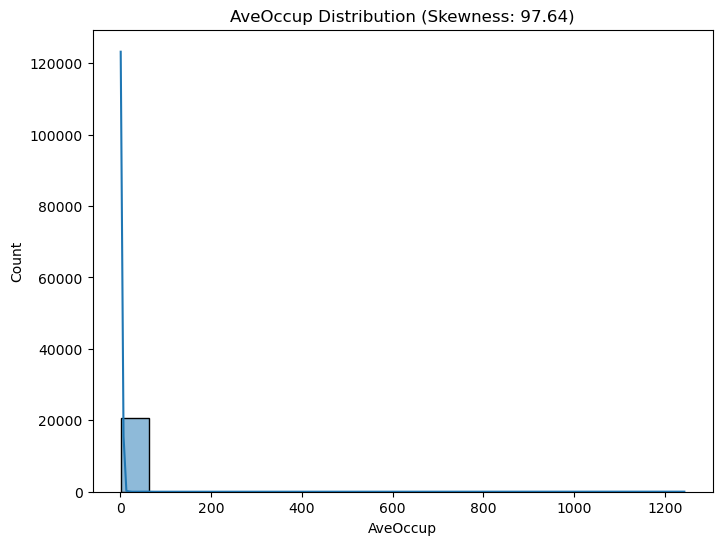

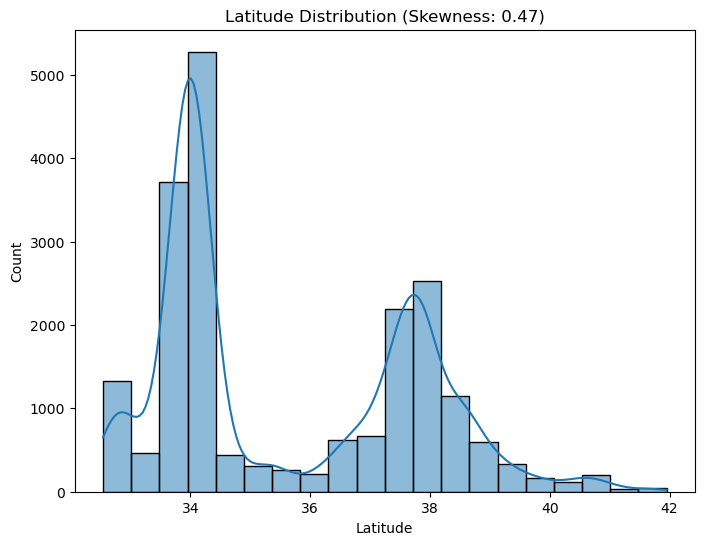

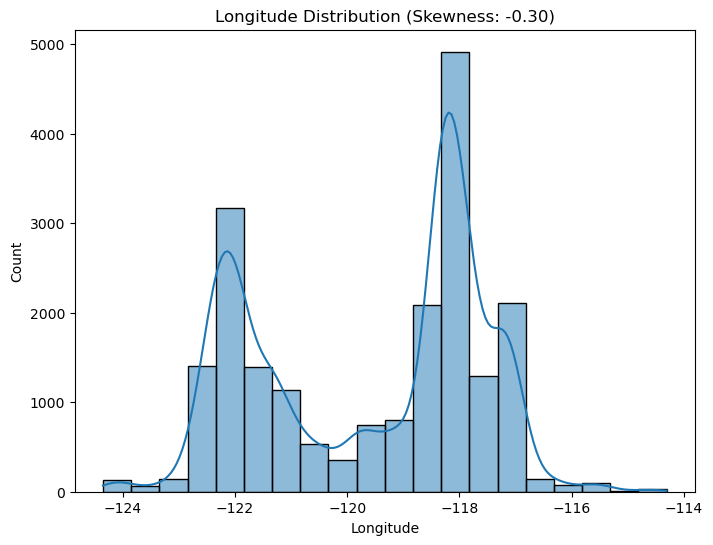

In [12]:
# Calculate skewness
print(df.skew())

# Visualize skewness for each feature
for feature in df.drop('target', axis=1).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'{feature} Distribution (Skewness: {df[feature].skew():.2f})')
    plt.show()


In [13]:
# Check min and max values
print(df.min())
print(df.max())


MedInc          0.499900
HouseAge        1.000000
AveRooms        0.846154
AveBedrms       0.333333
Population      3.000000
AveOccup        0.692308
Latitude       32.540000
Longitude    -124.350000
target          0.149990
dtype: float64
MedInc           15.000100
HouseAge         52.000000
AveRooms        141.909091
AveBedrms        34.066667
Population    35682.000000
AveOccup       1243.333333
Latitude         41.950000
Longitude      -114.310000
target            5.000010
dtype: float64


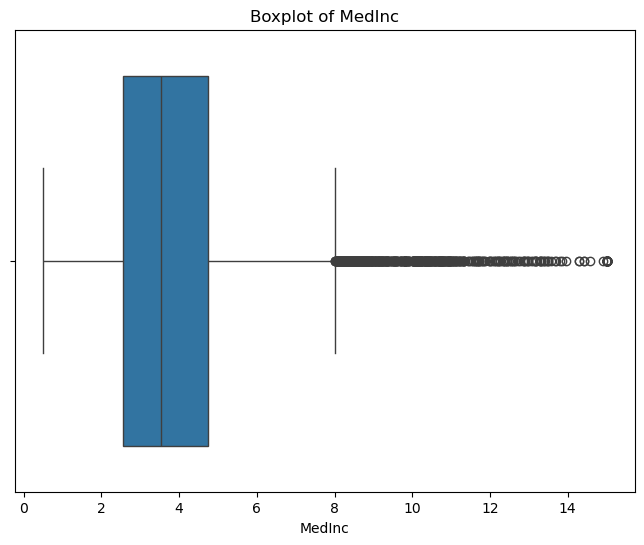

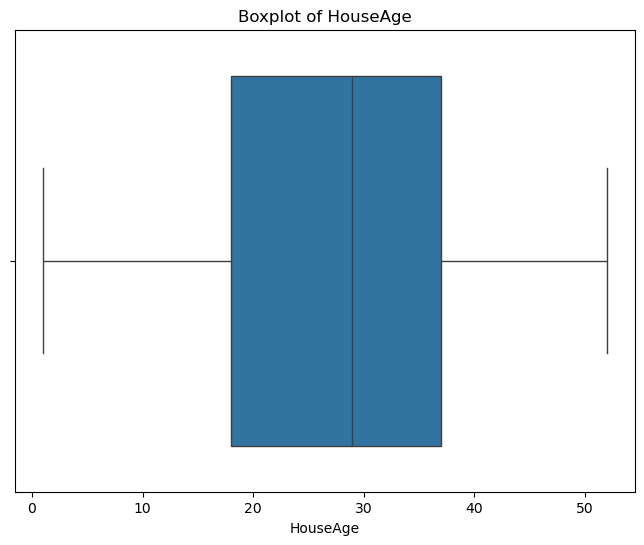

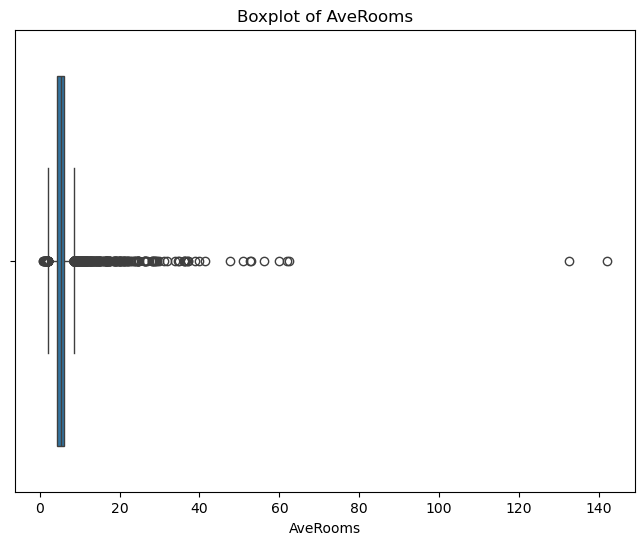

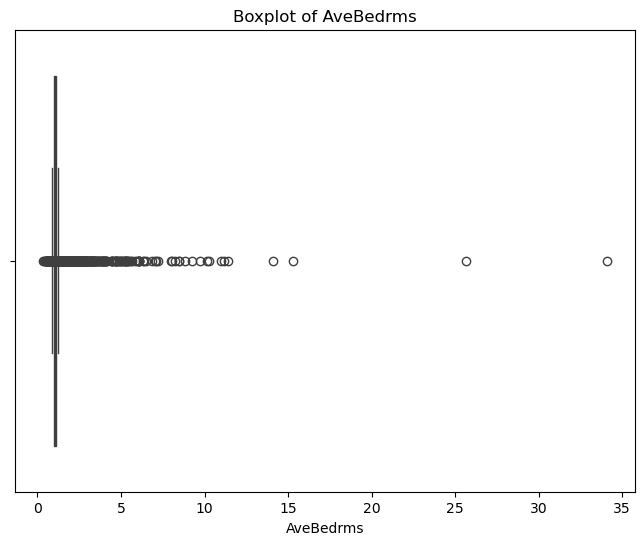

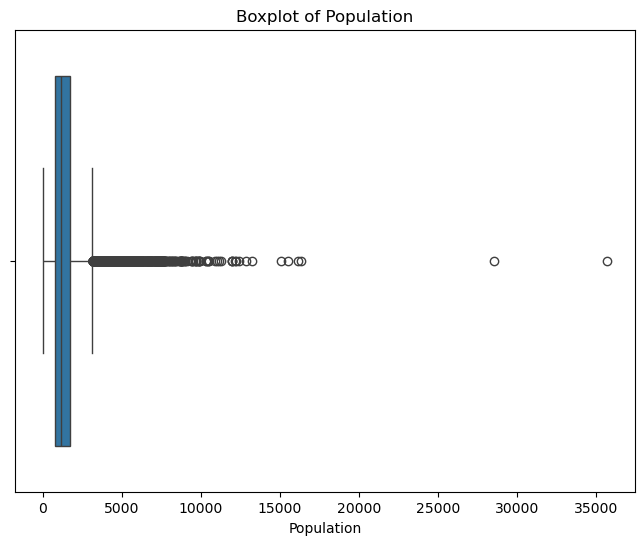

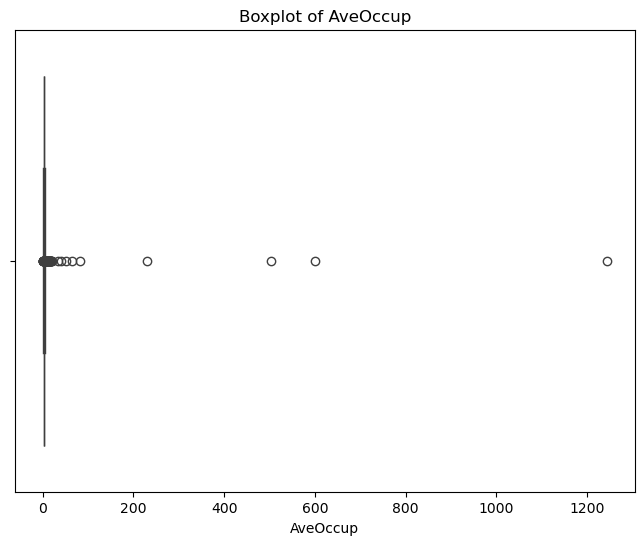

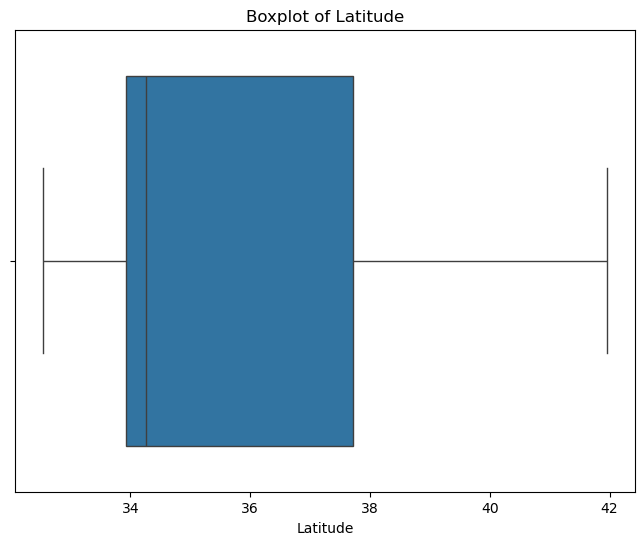

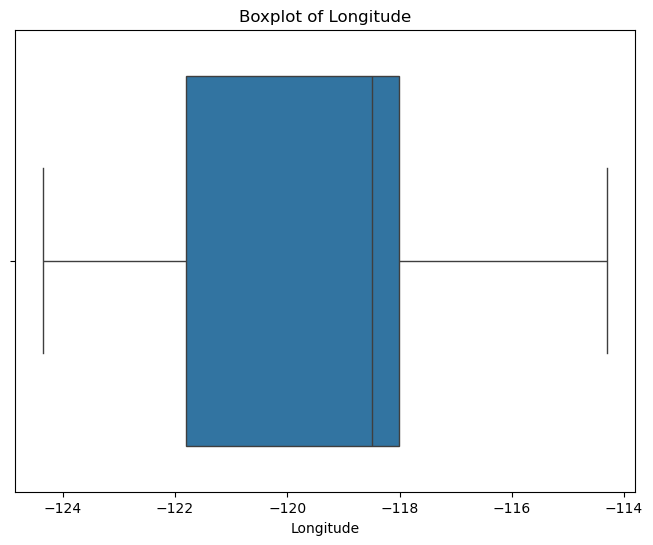

In [14]:
# Boxplots to check for outliers in each feature
for feature in df.drop('target', axis=1).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


Skewness of target: 0.9777632739098345


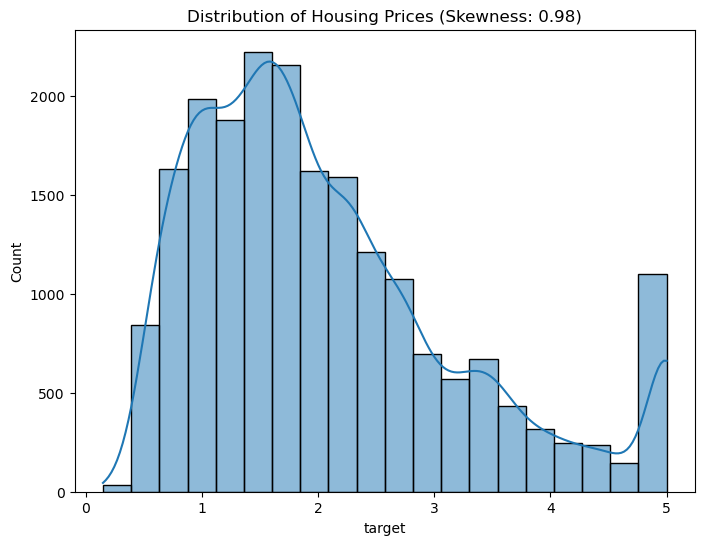

In [15]:
# Check skewness of the target variable
print(f"Skewness of target: {df['target'].skew()}")

# Visualize the target distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], kde=True, bins=20)
plt.title(f'Distribution of Housing Prices (Skewness: {df["target"].skew():.2f})')
plt.show()


In [16]:
## Multicollinearity Check

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Adding constant to the dataset for VIF calculation
X = add_constant(df.drop('target', axis=1))

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


      Feature           VIF
0       const  17082.623698
1      MedInc      2.501295
2    HouseAge      1.241254
3    AveRooms      8.342786
4   AveBedrms      6.994995
5  Population      1.138125
6    AveOccup      1.008324
7    Latitude      9.297624
8   Longitude      8.962263


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

In [18]:
# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Build a simple neural network model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Use the TensorFlow 2,x optimmizer
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

In [21]:
# Compile the model
model.compile(optimizer='adam', 
              loss='mean_squared_error')

In [22]:
# Train the model
history = model.fit(X_train_scaled,y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test_scaled, y_test))

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - loss: 1.4325 - val_loss: 0.4617
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 0.4124 - val_loss: 0.3892
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.3763 - val_loss: 0.3925
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.3554 - val_loss: 0.3545
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 0.3416 - val_loss: 0.3405
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 0.3242 - val_loss: 0.3350
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.3148 - val_loss: 0.3517
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.3157 - val_loss: 0.7292
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.3615 - val_loss: 0.3188
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 0.3092 - val_loss: 0.3053
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.2930 - val_loss: 0.3036
Epoch 12/100
516/51

In [23]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (MSE): {test_loss}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 0.2715
Test Loss (MSE): 0.27223101258277893


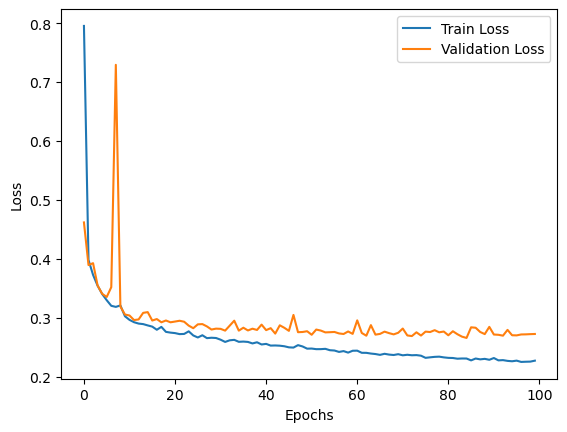

In [24]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step


In [26]:
# Show a few predictions vs true values
print("Predictions vs True values (first 10):")
for true, pred in zip(y_test[:10], y_pred[:10]):
    print(f"True: {true}, Pred: {pred[0]}")

Predictions vs True values (first 10):
True: 0.477, Pred: 0.527712345123291
True: 0.458, Pred: 1.1028708219528198
True: 5.00001, Pred: 4.831472396850586
True: 2.186, Pred: 2.392279624938965
True: 2.78, Pred: 2.5646378993988037
True: 1.587, Pred: 1.8062572479248047
True: 1.982, Pred: 2.304912567138672
True: 1.575, Pred: 1.5115511417388916
True: 3.4, Pred: 2.456057071685791
True: 4.466, Pred: 4.40894079208374


## Changing loss function - MAE

In [27]:
# Build a simple neural network model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Use the TensorFlow 2,x optimmizer
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer='adam', 
              loss='mae')

# Train the model
history = model.fit(X_train_scaled,y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test_scaled, y_test))


Epoch 1/100


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - loss: 0.8087 - val_loss: 0.4508
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.4484 - val_loss: 0.4314
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.4219 - val_loss: 0.4142
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.4039 - val_loss: 0.4015
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 0.3937 - val_loss: 0.3863
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 0.3850 - val_loss: 0.3822
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 0.3722 - val_loss: 0.3732
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.3674 - val_loss: 0.3771
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.3716 - val_loss: 0.3630
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 0.3524 - val_loss: 0.3668
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.3555 - val_loss: 0.3596
Epoch 12/100
516/516 ━━━━━━━━━━

In [28]:
test_loss= model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (MAE): {test_loss}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 0.3323
Test Loss (MAE): 0.3289417326450348


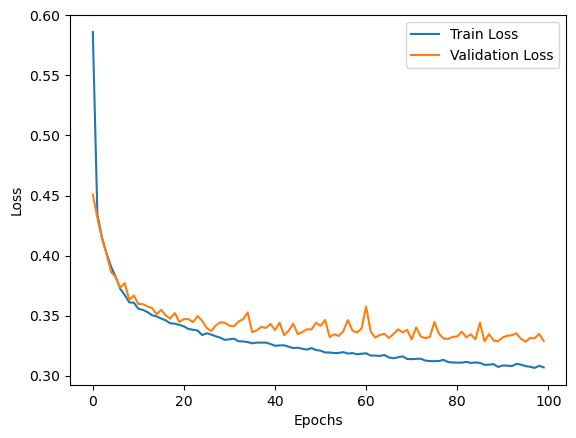

In [29]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Changing loss function - RMSE

In [30]:
import tensorflow as tf
from tensorflow.keras import backend as K

# Custom RMSE loss function
def rmse_loss(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model with RMSE as the loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=rmse_loss,  # Use the custom RMSE loss function
              metrics=[rmse_loss])  # You can also track RMSE as a metric

# Train the model
history = model.fit(X_train_scaled, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test_scaled, y_test))


Epoch 1/100


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - loss: 1.0530 - rmse_loss: 1.0530 - val_loss: 0.6369 - val_rmse_loss: 0.6369
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.6269 - rmse_loss: 0.6269 - val_loss: 0.6004 - val_rmse_loss: 0.6004
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.5873 - rmse_loss: 0.5873 - val_loss: 0.5775 - val_rmse_loss: 0.5775
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.5683 - rmse_loss: 0.5683 - val_loss: 0.5681 - val_rmse_loss: 0.5681
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.5558 - rmse_loss: 0.5558 - val_loss: 0.5619 - val_rmse_loss: 0.5619
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.5587 - rmse_loss: 0.5587 - val_loss: 0.5573 - val_rmse_loss: 0.5573
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.5451 - rmse_loss: 0.5451 - val_loss: 0.5466 - val_rmse_loss: 0.5466
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.5381 - rmse_loss

In [31]:
test_loss, test_mse = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (RMSE): {test_loss}")
print(f"Test metics (rmse_loss) : {test_mse}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 0.5006 - rmse_loss: 0.5006
Test Loss (RMSE): 0.502178966999054
Test metics (rmse_loss) : 0.502178966999054


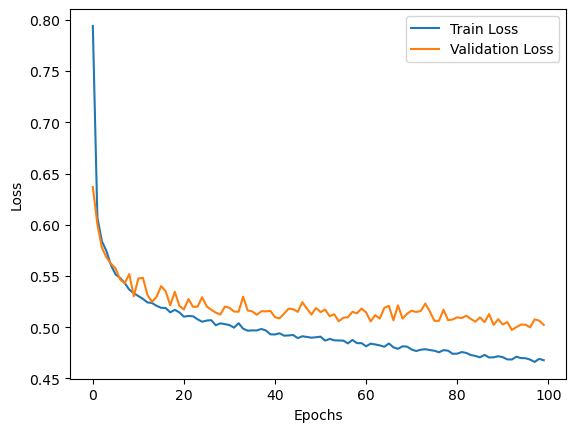

In [32]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Changing loss function - Huber Loss

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Set the delta value for Huber Loss
delta = 1.0

# Build a simple neural network model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model with Huber Loss and some custom delta value
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.Huber(delta=delta),  # Huber Loss with a specific delta
              metrics=['mae', 'mse'])  # Optional: Track MAE and MSE as metrics

# Train the model
history = model.fit(X_train_scaled, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test_scaled, y_test))


Epoch 1/100


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - loss: 0.6560 - mae: 1.0201 - mse: 2.1986 - val_loss: 0.1893 - val_mae: 0.4620 - val_mse: 0.4510
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 0.1790 - mae: 0.4520 - mse: 0.4176 - val_loss: 0.1665 - val_mae: 0.4345 - val_mse: 0.3844
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 0.1667 - mae: 0.4321 - mse: 0.3912 - val_loss: 0.1585 - val_mae: 0.4231 - val_mse: 0.3638
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.1492 - mae: 0.4054 - mse: 0.3400 - val_loss: 0.1541 - val_mae: 0.4182 - val_mse: 0.3507
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.1460 - mae: 0.3991 - mse: 0.3391 - val_loss: 0.1469 - val_mae: 0.3953 - val_mse: 0.3386
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 0.1430 - mae: 0.3928 - mse: 0.3271 - val_loss: 0.1418 - val_mae: 0.3879 - val_mse: 0.3254
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 0.1345 - mae: 0.3771 - mse: 0.3

In [34]:
# Evaluate the model on the test set
test_loss= model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (Huber): {test_loss}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 0.1150 - mae: 0.3378 - mse: 0.2580
Test Loss (Huber): [0.11535883694887161, 0.3354870080947876, 0.2622109055519104]


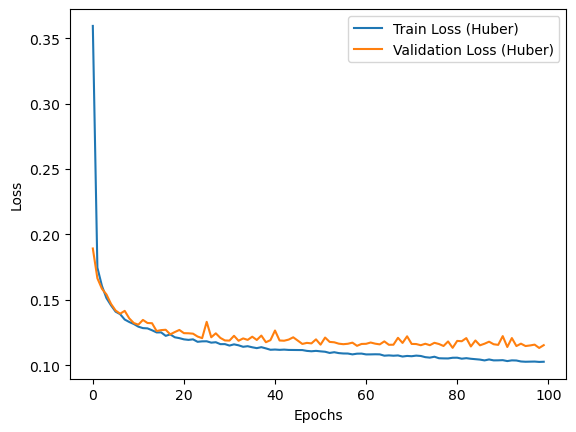

In [35]:
# Plot training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss (Huber)')
plt.plot(history.history['val_loss'], label='Validation Loss (Huber)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Changing loss function - MBE Loss

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define custom Mean Bias Error loss function
def mean_bias_error(y_true, y_pred):
    return tf.reduce_mean(y_pred - y_true)

# Build a simple neural network model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model with Mean Bias Error loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=mean_bias_error,  # Custom Mean Bias Error loss
              metrics=['mse'])  # Optional: Track MAE and MSE as metrics

# Train the model
history = model.fit(X_train_scaled, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test_scaled, y_test))

Epoch 1/100


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - loss: -110.3644 - mse: 66546.1875 - val_loss: -1780.0734 - val_mse: 3407845.2500
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: -3788.0764 - mse: 20239340.0000 - val_loss: -13770.1748 - val_mse: 202030528.0000
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: -19543.1211 - mse: 437546880.0000 - val_loss: -42794.6289 - val_mse: 1946075776.0000
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: -53446.2383 - mse: 3129475328.0000 - val_loss: -92750.9062 - val_mse: 9134201856.0000
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: -108612.3203 - mse: 12709927936.0000 - val_loss: -166192.8281 - val_mse: 29319841792.0000
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: -187564.5781 - mse: 37634928640.0000 - val_loss: -265034.5938 - val_mse: 74563698688.0000
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: -291931.3750 - mse: 90730422272.0000 - val_loss: -390736.5312 -

In [37]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (MBE): {test_loss}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: -340095072.0000 - mse: 122953471891603456.0000
Test Loss (MBE): [-340402912.0, 1.2406353195905843e+17]


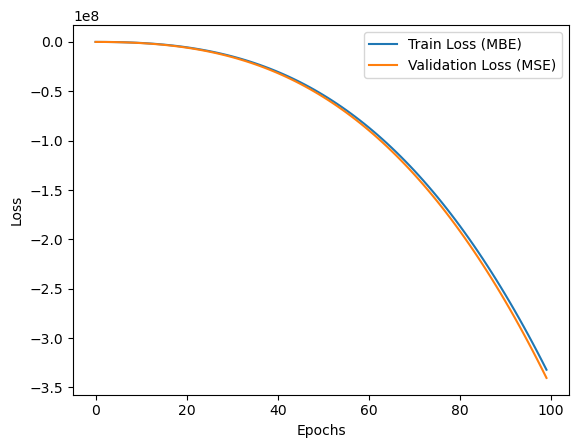

In [38]:
# Plot training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss (MBE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Changing loss function - Log Cosh Loss

In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Build a simple neural network model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model with Log-Cosh Loss
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.LogCosh(),  # Log-Cosh Loss
              metrics=['mse'])  # Optional: Track MAE and MSE as metrics

# Train the model
history = model.fit(X_train_scaled, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test_scaled, y_test))


Epoch 1/100


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - loss: 0.4088 - mse: 1.3171 - val_loss: 0.1602 - val_mse: 0.4105
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.1533 - mse: 0.3899 - val_loss: 0.1455 - val_mse: 0.3705
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.1408 - mse: 0.3547 - val_loss: 0.1390 - val_mse: 0.3546
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.1324 - mse: 0.3336 - val_loss: 0.1348 - val_mse: 0.3427
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.1312 - mse: 0.3350 - val_loss: 0.1284 - val_mse: 0.3262
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.1264 - mse: 0.3218 - val_loss: 0.1266 - val_mse: 0.3197
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.1253 - mse: 0.3160 - val_loss: 0.1239 - val_mse: 0.3127
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.1217 - mse: 0.3061 - val_loss: 0.1227 - val_mse: 0.3061
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [40]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (Log-Cosh): {test_loss}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.1009 - mse: 0.2472
Test Loss (Log-Cosh): [0.10257995128631592, 0.25505369901657104]


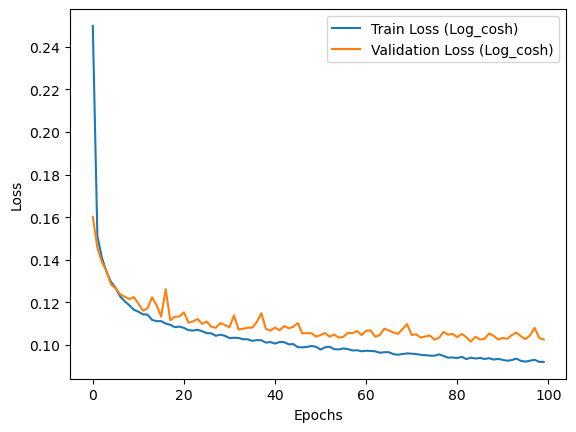

In [41]:
# Plot training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss (Log_cosh)')
plt.plot(history.history['val_loss'], label='Validation Loss (Log_cosh)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Second task: Custom loss function

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Custom loss function that prioritizes high-value houses
def weighted_loss(threshold=20000, weight_factor=3):
    def loss(y_true, y_pred):
        # Calculate the standard loss (e.g., Mean Squared Error)
        error = y_true - y_pred
        squared_error = tf.square(error)

        # Create a weight based on whether the actual price is above or below the threshold
        weight = tf.where(y_true > threshold, tf.cast(weight_factor, tf.float32), tf.cast(1.0, tf.float32))

        # Apply the weight to the squared error
        weighted_loss = weight * squared_error
        return tf.reduce_mean(weighted_loss)  # Return mean loss

    return loss


In [43]:
# Load and preprocess the California housing dataset
# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are already prepared

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer with shape
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model with the custom weighted loss
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=weighted_loss(threshold=200000, weight_factor=3),  # Custom loss function
              metrics=['mae', 'mse'])  # Optional: Track MAE and MSE as additional metrics

# Train the model
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test))


Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - loss: 1.9549 - mae: 0.8980 - mse: 1.9549 - val_loss: 0.4561 - val_mae: 0.4759 - val_mse: 0.4561
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.4270 - mae: 0.4629 - mse: 0.4270 - val_loss: 0.3994 - val_mae: 0.4479 - val_mse: 0.3994
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.3820 - mae: 0.4405 - mse: 0.3820 - val_loss: 0.3749 - val_mae: 0.4355 - val_mse: 0.3749
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.3690 - mae: 0.4299 - mse: 0.3690 - val_loss: 0.3658 - val_mae: 0.4272 - val_mse: 0.3658
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.3482 - mae: 0.4188 - mse: 0.3482 - val_loss: 0.3566 - val_mae: 0.4209 - val_mse: 0.3566
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.8301 - mae: 0.4284 - mse: 0.8301 - val_loss: 0.3474 - val_mae: 0.4121 - val_mse: 0.3474
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.3310 - mae: 0.402

In [44]:
# Evaluate the model on the test set
test_loss, test_mae, test_mse = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (Custom Weighted Loss): {test_loss}")
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.2616 - mae: 0.3440 - mse: 0.2616
Test Loss (Custom Weighted Loss): 0.2715620994567871
Test MAE: 0.3467847406864166
Test MSE: 0.2715620994567871


In [45]:
import tensorflow as tf
from tensorflow.keras import backend as K

# Define the custom loss function
def custom_loss(y_true, y_pred):
    alpha = 0.01  # Weight for houses above $200,000 threshold
    threshold = 2  # Scaled threshold corresponding to $200,000 (since 2 maps to $200,000 in the scaling range 0-5)
    
    # Calculate the squared error
    squared_error = K.square(y_true - y_pred)
    
    # Assign higher weight to houses above the threshold
    weights = K.cast(K.greater_equal(y_true, threshold), K.floatx()) * (alpha - 1) + 1
    weighted_error = weights * squared_error
    
    # Return the mean of the weighted errors
    return K.mean(weighted_error)

In [46]:
# Example model architecture (assuming the features are ready in X_train)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression (predicting a single value)
])

# Compile the model with the custom loss function
model.compile(optimizer='adam', loss=custom_loss)

# Train the model
history = model.fit(X_train, 
                    y_train, 
                    epochs=100, 
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test))

Epoch 1/100


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - loss: 1180.7301 - val_loss: 1.1554
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 34.9056 - val_loss: 1.1512
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 1.0010 - val_loss: 1.1187
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 21.6868 - val_loss: 1.1127
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.6257 - val_loss: 1.1097
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 1.3016 - val_loss: 1.1049
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 6.9308 - val_loss: 1.0897
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.3321 - val_loss: 1.0962
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 9.5840 - val_loss: 1.0803
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 40.6250 - val_loss: 1.0720
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.3576 - val_loss: 1.0627
Epoch 12/100
516/516 ━━━━

In [47]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (Custom Weighted Loss): {test_loss}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 0.3388
Test Loss (Custom Weighted Loss): 0.3469856083393097


In [48]:
# Make predictions
y_pred = model.predict(X_test)

# You can analyze the performance specifically on high-value houses (y_test > 2, for example)
high_value_indices = y_test > 2  # This corresponds to actual prices > $200,000
high_value_predictions = y_pred[high_value_indices]
high_value_true = y_test[high_value_indices]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step


In [49]:
# Calculate metrics for high-value predictions (e.g., Mean Absolute Error or RMSE)
from sklearn.metrics import mean_absolute_error
high_value_mae = mean_absolute_error(high_value_true, high_value_predictions)
print(f'Mean Absolute Error for High-Value Houses: {high_value_mae}')


Mean Absolute Error for High-Value Houses: 1.3153780302291875


In [50]:
min_value = df['target'].min()
max_value = df['target'].max()

print(f"Min value: {min_value}")
print(f"Max value: {max_value}")


Min value: 0.14999
Max value: 5.00001


Epoch 1/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.0724
Epoch 2/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 0.0787
Epoch 3/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.0746
Epoch 4/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.0750
Epoch 5/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.0714
Epoch 6/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.0726
Epoch 7/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 0.0704
Epoch 8/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 0.0706
Epoch 9/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 0.0689
Epoch 10/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 0.0702
Epoch 11/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.0696
Epoch 12/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 0.0696
Epoch 13/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.0691
Epoch 14/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.0735
Epoch 15/50
258/258 ━━━━━━━━━

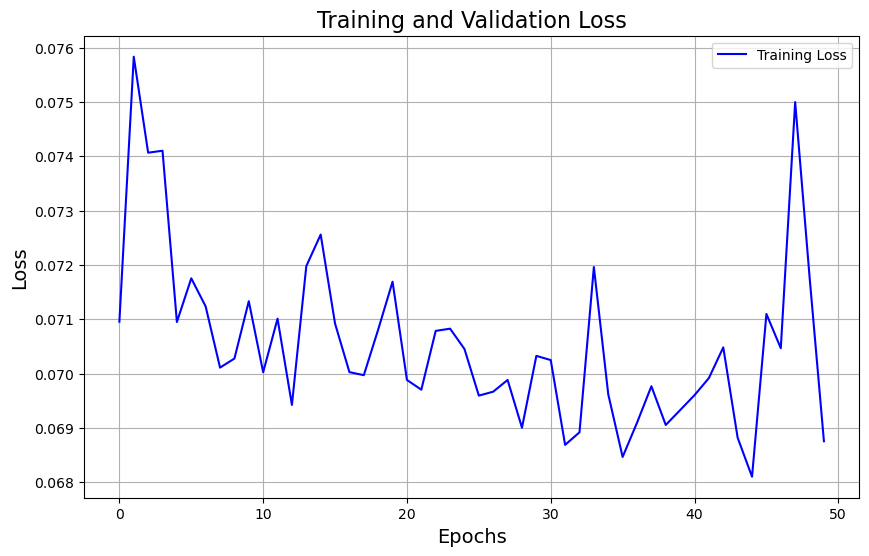

In [51]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Fit the model and store the history
history = model.fit(X_train,
                    y_train, 
                    epochs=50,
                    batch_size=64)

# Plotting the loss function
plt.figure(figsize=(10, 6))

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')

# Add titles and labels
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
